Hi there! I'm MustafaShoukat, a data scientist in training. I'm diving into the world of data science and exploring various concepts and techniques to enhance my skills. Join me on this exciting journey as we learn and grow in the field of data science together

> "Community is the heart of growth and learning. Together, we can achieve more than we ever could alone."





| Name               | Email                                               | LinkedIn                                                  | GitHub                                           | Kaggle                                        |
|--------------------|-----------------------------------------------------|-----------------------------------------------------------|--------------------------------------------------|-----------------------------------------------|
| **Mustafa Shoukat**      |mustafashoukat.email@gmail.com  | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-%23000000.svg?style=for-the-badge&logo=LinkedIn&logoColor=white)](https://www.linkedin.com/in/mustafashoukat/)  | [![GitHub Badge](https://img.shields.io/badge/GitHub-%23000000.svg?style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/Mustafa-Shoukat1)  | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-%23000000.svg?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/mustafashoukat)  |

# Time Series Data

Time series data is a type of data that is collected over time at regular intervals. It is a sequence of data points that are ordered chronologically and can be used to analyze trends, patterns, and behaviors over time. Time series data can be collected from a variety of sources, such as sensors, financial markets, weather stations, and social media platforms.

Examples of time series data include:
- Stock prices
- Temperature readings
- Website traffic
- Sales data

Time series data can be analyzed using various statistical and machine learning techniques, such as:
- Regression analysis
- ARIMA models
- Deep learning models

Time series data is often used in forecasting and prediction applications, where the goal is to predict future values based on past observations. Time series analysis can also be used to identify anomalies, trends, and seasonality in the data, which can provide insights into the underlying processes that generate the data.

Overall, time series data is an important type of data that is used in many different fields, including finance, economics, engineering, and social sciences.


## Imports 📥📦📤

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # For fetching the data form the Yahoo Finance
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# !pip install statsmodels==0.13.5
import statsmodels.tsa.arima_model as SARIMAX


In [ ]:
import datetime
from datetime import timedelta

# Create a datetime object for today's date
today = datetime.datetime.now()

# Add 10 days to today's date
ten_days_from_now = today + timedelta(days=10)

# Print the date 10 days from now
print(ten_days_from_now)

2024-05-24 19:13:52.396560


# Fetching and Preparning the data 📊🔍

In [ ]:
today = date.today()

# Calculate the date two years ago from today
two_years_ago = today - timedelta(days=365 * 2)

# Format the dates as YYYY-MM-DD
start_date = two_years_ago.strftime("%Y-%m-%d")
end_date = today.strftime("%Y-%m-%d")

# Print the start and end dates
print(f"Start date: {start_date}\nEnd date: {end_date}")

ticker_symbol = "GOOG"

# Fetch the historical data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

print(data.shape)
data.head()

[*********************100%%**********************]  1 of 1 completed

Start date: 2022-05-15
End date: 2024-05-14
(501, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-16,115.384003,116.607498,114.334999,114.792503,114.792503,23282000
2022-05-17,117.227501,117.227501,115.337502,116.701500,116.701500,21576000
2022-05-18,115.237503,115.695648,112.141998,112.401001,112.401001,27982000
2022-05-19,111.841003,113.587502,110.468002,110.745499,110.745499,29192000
2022-05-20,112.085503,112.550003,106.373001,109.313004,109.313004,37586000


In [ ]:
df = data.copy()

In [ ]:
df.insert(loc=0, column='Date', value=df.index)

In [ ]:
df.drop(columns=['Date'], inplace=True)
df.reset_index(inplace=True)

In [ ]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2022-05-16,114.792503
1,2022-05-17,116.701500
2,2022-05-18,112.401001
3,2022-05-19,110.745499
4,2022-05-20,109.313004


In [ ]:
# !pip install dash

# Creating hte rough dashboard

In [ ]:
df.describe()

,Date,Close
count,501,501.000000
mean,2023-05-14 15:05:23.353293312,120.719649
min,2022-05-16 00:00:00,83.489998
25%,2022-11-11 00:00:00,103.629997
50%,2023-05-15 00:00:00,120.010002
75%,2023-11-10 00:00:00,136.929993
max,2024-05-13 00:00:00,173.690002
std,NaN,20.492215


In [ ]:
data.insert(loc=0, column='Date', value=df.index)
data.drop(columns=['Date'], inplace=True)
data.reset_index(inplace=True)

fig = px.line(data, x = 'Date', y = data.columns, title='Google Stock Prices (Entire data)')

# Show the plot
fig.show()


TypeError: unsupported operand type(s) for +: 'int' and 'datetime.timedelta'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.8 MB/s eta 0:00:00


In [ ]:

def stationarity_check(series):
  """
  This function checks the stationarity of a time series using the Dickey-Fuller test.

  Args:
    series: The time series data.

  Returns:
    A dictionary containing the results of the Dickey-Fuller test.
  """

  # Perform the Dickey-Fuller test:
  result = adfuller(series)

  # Extract the test statistic and p-value:
  ADF_statistic = result[0]
  p_value = result[1]

  # Create a dictionary to store the results:
  test_result = {
      "ADF Statistic": ADF_statistic,
      "p-value": p_value,
  }

  # Check the p-value against a significance level (e.g., 0.05):
  if p_value <= 0.05:
    test_result["Conclusion"] = "Stationary"
  else:
    test_result["Conclusion"] = "Non-stationary"

  return test_result


In [ ]:
# Plot the time series data
fig = px.line(df, x='Date', y='Close', title='Google Stock Prices (Entire data)')

# Show the plot
fig.show()

# Print the stationarity test result
print(result)


{'ADF Statistic': -0.2992299254753326, 'p-value': 0.9256133270184765, 'Conclusion': 'Non-stationary'}


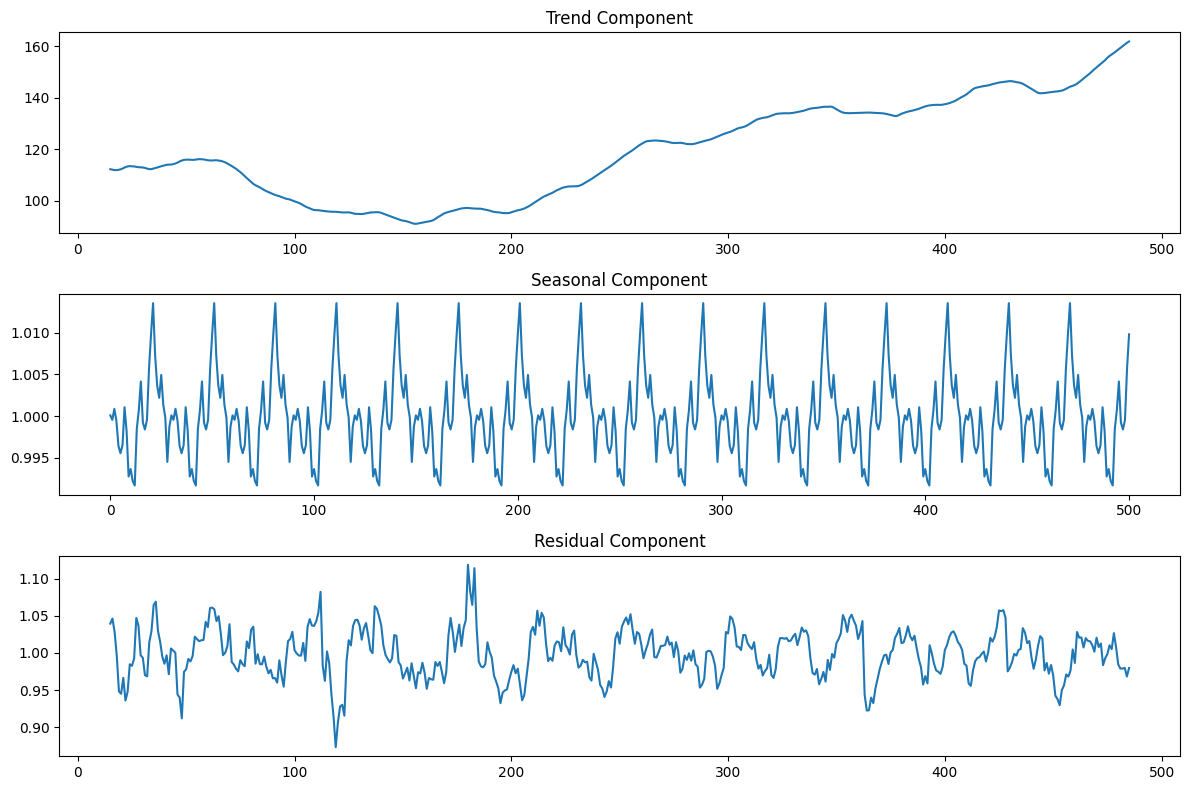

In [ ]:
import matplotlib.pyplot as plt
# Decompose the time series data
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=30)

# Plot the decomposed components
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Plot the trend component
decomposition.trend.plot(ax=axs[0], label='Trend')
axs[0].set_title('Trend Component')

# Plot the seasonal component
decomposition.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_title('Seasonal Component')

# Plot the residual component
decomposition.resid.plot(ax=axs[2], label='Residuals')
axs[2].set_title('Residual Component')

# Adjust spacing and display the plots
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



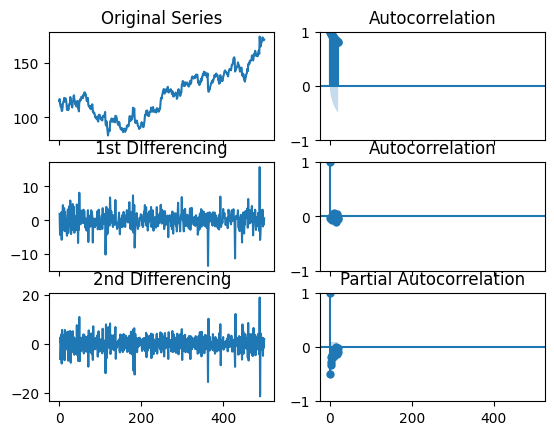

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

# Set window size (number of lags to plot)
window = 20

# Plot ACF and PACF
fig, axes = plt.subplots(3, 2, sharex=True)

axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1], lags=window)

axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1], lags=window)

axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Differencing')
plot_pacf(df['Close'].diff().diff().dropna(), ax=axes[2, 1], lags=window)

plt.show()


In [ ]:
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_data.shape, test_data.shape

((400, 2), (101, 2))

# Prophet Model

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu4m3_kql/16mlaq96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu4m3_kql/zf4cs62k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45996', 'data', 'file=/tmp/tmpu4m3_kql/16mlaq96.json', 'init=/tmp/tmpu4m3_kql/zf4cs62k.json', 'output', 'file=/tmp/tmpu4m3_kql/prophet_modelbhf9go7a/prophet_model-20240514210202.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:02:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:02:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


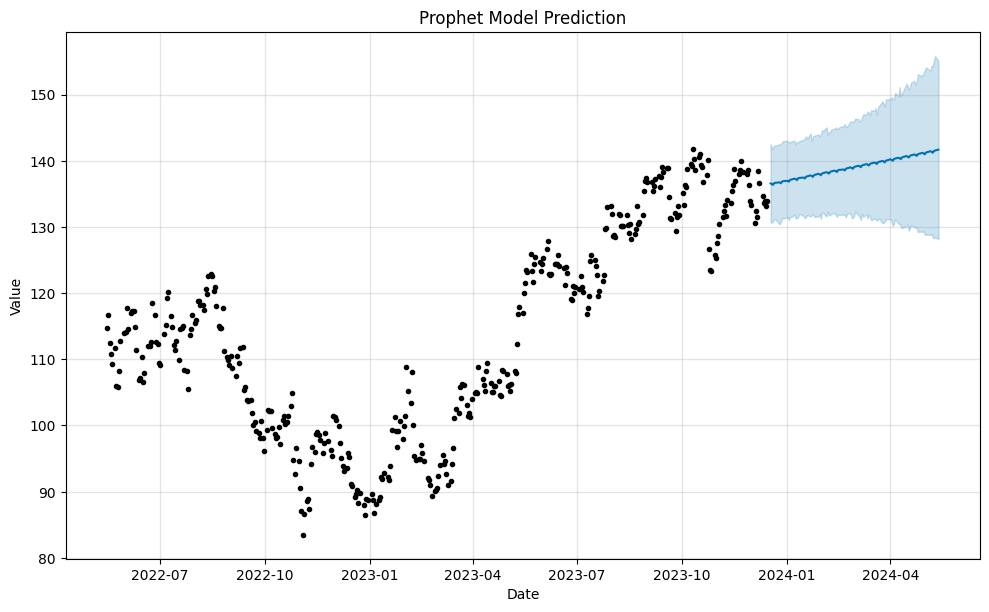

In [ ]:
from prophet import Prophet



prophet_model = Prophet()
prophet_model.fit(train_data)

# Make predictions for the test data
future = pd.DataFrame(test_data['ds'])
forecast = prophet_model.predict(future)

# Plot actual test data and predictions
fig = prophet_model.plot(forecast, xlabel='Date', ylabel='Value')
plt.title('Prophet Model Prediction')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['y'], forecast['yhat']))

# Calculate MAE
mae = mean_absolute_error(test_data['y'], forecast['yhat'])

print("RMSE:", rmse)
print("MAE:", mae)


RMSE: 13.765751290728232
MAE: 10.934497844812633


In [ ]:
from prophet import Prophet
import pandas as pd
import plotly.graph_objects as go


# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(train_data)

# Create a DataFrame with future dates for prediction
future_dates = prophet_model.make_future_dataframe(periods=30)

# Make predictions for the future dates
forecast = prophet_model.predict(future_dates)

# Plot the forecast using Plotly
fig = go.Figure()

# Plot actual data
fig.add_trace(go.Scatter(x=train_data['ds'], y=train_data['y'], mode='lines', name='Training Data'))
fig.add_trace(go.Scatter(x=test_data['ds'], y=test_data['y'], mode='lines', name='Test Data'))

# Plot forecasted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

# Update layout
fig.update_layout(title='Prophet Model Forecast',
                  xaxis_title='Date',
                  yaxis_title='Value')

# Show the plot
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu4m3_kql/bi0dxg66.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu4m3_kql/o8dbsmer.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42808', 'data', 'file=/tmp/tmpu4m3_kql/bi0dxg66.json', 'init=/tmp/tmpu4m3_kql/o8dbsmer.json', 'output', 'file=/tmp/tmpu4m3_kql/prophet_model2muztjdq/prophet_model-20240514213950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:39:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['y'], forecast['yhat'][-len(test_data):])

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['y'], forecast['yhat'][-len(test_data):])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_data['y'] - forecast['yhat'][-len(test_data):]) / test_data['y'])) * 100

# Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 2 * np.mean(np.abs(test_data['y'] - forecast['yhat'][-len(test_data):]) / (np.abs(test_data['y']) + np.abs(forecast['yhat'][-len(test_data):]))) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)


Mean Absolute Error (MAE): 14.161570073156241
Mean Squared Error (MSE): 279.2978577602447
Root Mean Squared Error (RMSE): 16.712206848894752
Mean Absolute Percentage Error (MAPE): 4.637708310807068
Symmetric Mean Absolute Percentage Error (SMAPE): 4.7996884925835355


In [ ]:
# Create a DataFrame with future dates for prediction
future_dates = prophet_model.make_future_dataframe(periods=80)  # Predict next 45 days

# Make predictions for the future dates
forecast = prophet_model.predict(future_dates)

# Plot the forecast using Plotly
fig = go.Figure()

# Plot actual data
fig.add_trace(go.Scatter(x=train_data['ds'], y=train_data['y'], mode='lines', name='Training Data'))
fig.add_trace(go.Scatter(x=test_data['ds'], y=test_data['y'], mode='lines', name='Test Data'))

# Plot forecasted values
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

# Update layout
fig.update_layout(title='Prophet Model Forecast',
                  xaxis_title='Date',
                  yaxis_title='Value')

# Show the plot
fig.show()

In [ ]:
# Create a DataFrame with future dates for prediction
future_dates = prophet_model.make_future_dataframe(periods=30)

# Make predictions for the future dates
forecast = prophet_model.predict(future_dates)

# Create Dash app
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1(children='Prophet Model Forecast'),

    # Graph component for displaying forecast
    dcc.Graph(id='prophet-forecast')
])

# Define callback to update graph with Prophet forecast
@app.callback(
    Output('prophet-forecast', 'figure'),
    [Input('prophet-forecast', 'value')]
)
def update_graph(selected_analysis):
    # Plot forecast using Plotly
    fig = go.Figure()

    # Plot actual data
    fig.add_trace(go.Scatter(x=train_data['ds'], y=train_data['y'], mode='lines', name='Training Data'))
    fig.add_trace(go.Scatter(x=test_data['ds'], y=test_data['y'], mode='lines', name='Test Data'))

    # Plot forecasted values
    fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast'))

    # Update layout
    fig.update_layout(title='Prophet Model Forecast',
                      xaxis_title='Date',
                      yaxis_title='Value')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Arima is not better then Prophet

In [ ]:
import pmdarima as pm
from pmdarima.arima.utils import ndiffs

# Assuming df is your DataFrame with the time series data

# Determine the differencing order using kpss test
d = ndiffs(df['y'], test='kpss')

# Fit auto_arima model
model = pm.auto_arima(df['y'], d=d, seasonal=False, stepwise=True, suppress_warnings=True)

# Print the selected orders
print("Selected order:", model.order)


Selected order: (0, 1, 0)


In [ ]:
from statsmodels.graphics.tsaplots import acf

# Calculate autocorrelation values
acf_values, _ = acf(df['y'], nlags=20, fft=False, alpha=0.05)

# Find the first lag where autocorrelation crosses the significance threshold
for lag, acf_value in enumerate(acf_values):
    if abs(acf_value) >= 0.05:  # Change significance threshold if needed
        p = lag
        break

# Print the value of p
print("Estimated value of p:", p)


Estimated value of p: 0


    Autocorrelation
0          1.000000
1          0.986341
2          0.973411
3          0.960545
4          0.948268
5          0.935527
6          0.924438
7          0.913788
8          0.903554
9          0.894166
10         0.884479
11         0.874080
12         0.861318
13         0.853102
14         0.843965
15         0.836048
16         0.830045
17         0.824945
18         0.819217
19         0.812806
20         0.806784


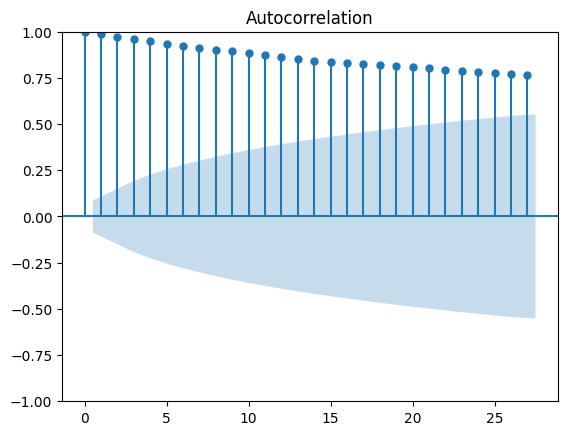

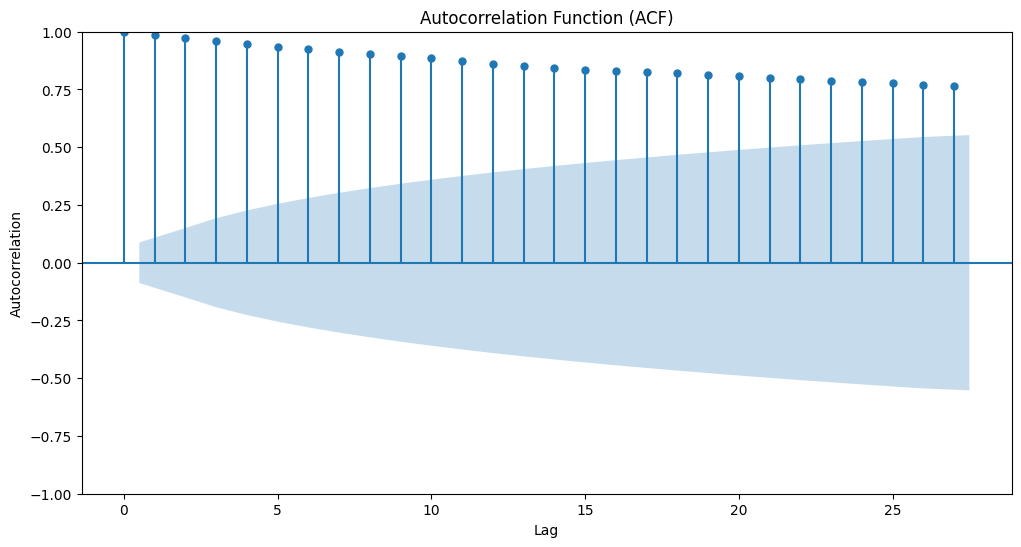

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



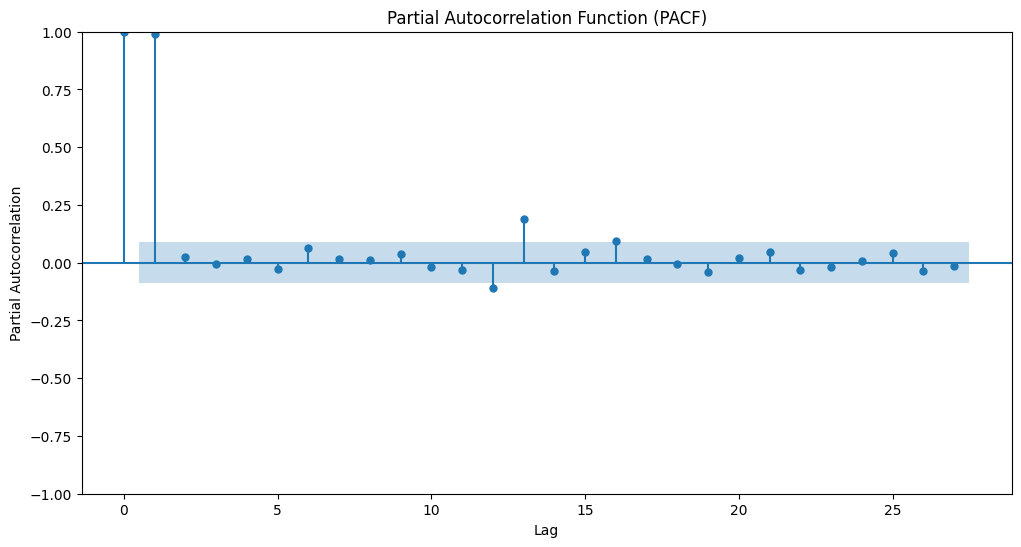

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf


# Calculate autocorrelation values
acf_values = acf(df['y'], nlags=20, fft=False)

plot_acf(df['y'], alpha = 0.05)
# Create DataFrame with autocorrelation values
X_acf = pd.DataFrame(acf_values, columns=['Autocorrelation'])

print(X_acf)

# Plot the Autocorrelation Function (ACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['y'], ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['y'], ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


    Partial Autocorrelation
0                  1.000000
1                 -0.036855
2                 -0.034727
3                 -0.037561
4                 -0.003016
5                 -0.057125
6                 -0.028753
7                 -0.021480
8                 -0.007704
9                  0.040954
10                -0.004056
11                 0.062758
12                -0.046570
13                 0.003451
14                -0.058965
15                -0.096539
16                -0.025820
17                 0.008107
18                 0.046113
19                -0.022128
20                -0.038548


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



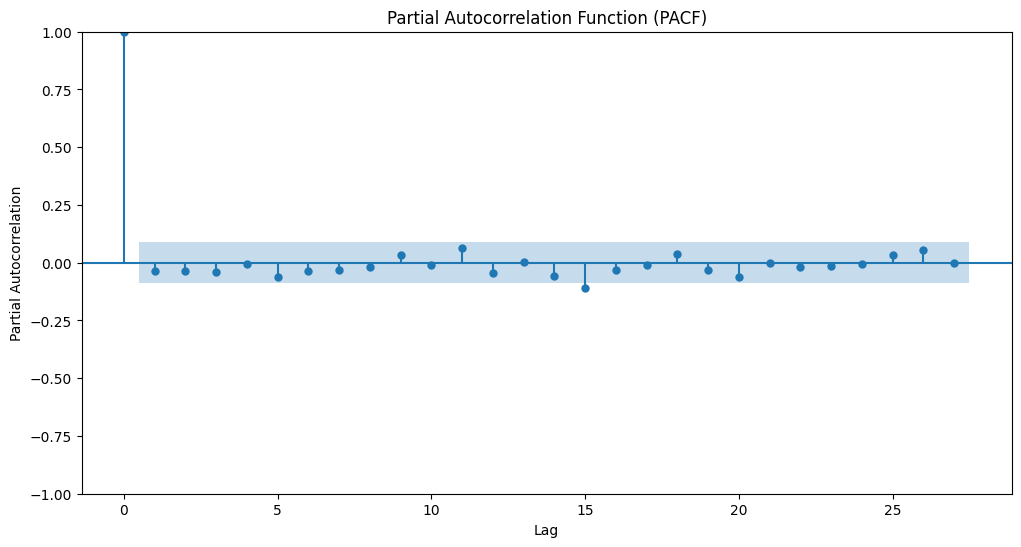

Estimated value of q: 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the partial autocorrelation values
pacf_values = acf(df['y'].diff().dropna(), nlags=20, fft=False)

# Create DataFrame with partial autocorrelation values
X_pacf = pd.DataFrame(pacf_values, columns=['Partial Autocorrelation'])

print(X_pacf)

# Plot the Partial Autocorrelation Function (PACF)
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['y'].diff().dropna(), ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# Determine the value of q
for lag, pacf_value in enumerate(pacf_values):
    if abs(pacf_value) < 0.05:  # Change significance threshold if needed
        q = lag
        break

print("Estimated value of q:", q)


In [ ]:
import pandas as pd
from pmdarima import auto_arima

# Assuming df is your DataFrame with 'ds' and 'y' columns

# Fit auto_arima model
model = auto_arima(df['y'], start_p=1, start_q=1, max_p=3 , max_q=3, m=12, seasonal=True, d=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

# Get the selected orders
p, d, q = model.order

# Print the selected orders
print("Selected orders (p, d, q):", p, d, q)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2362.503, Time=3.71 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4450.861, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3527.088, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6241.039, Time=0.05 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2361.110, Time=2.33 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=2360.074, Time=0.49 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=2361.119, Time=1.46 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=3844.342, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=2360.412, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=2361.544, Time=0.78 sec
 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=3414.624, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming test_data is your DataFrame with 'ds' and 'y' columns and forecast is your forecast DataFrame

# Make predictions on the test data
forecast_values = model.predict(n_periods=len(test_data))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_data['y'], forecast_values)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data['y'], forecast_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test_data['y'] - forecast_values) / test_data['y'])) * 100

# Calculate Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 2 * np.mean(np.abs(test_data['y'] - forecast_values) / (np.abs(test_data['y']) + np.abs(forecast_values))) * 100

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)


Mean Absolute Error (MAE): 16.64176013113744
Mean Squared Error (MSE): 362.22433704504124
Root Mean Squared Error (RMSE): 19.032192124005086
Mean Absolute Percentage Error (MAPE): nan
Symmetric Mean Absolute Percentage Error (SMAPE): nan


In [ ]:
data.to_csv('Google (GOOG) Stock Future Prices Prediction  May 2024')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-16,115.384003,116.607498,114.334999,114.792503,114.792503,23282000
1,2022-05-17,117.227501,117.227501,115.337502,116.701500,116.701500,21576000
2,2022-05-18,115.237503,115.695648,112.141998,112.401001,112.401001,27982000
3,2022-05-19,111.841003,113.587502,110.468002,110.745499,110.745499,29192000
4,2022-05-20,112.085503,112.550003,106.373001,109.313004,109.313004,37586000
